In [1]:
import pandas as pd
from nsepy import get_history
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt


import pandas as pd

#!pip install yfinance
from nsepy import get_history
import datetime as dt
import yfinance as yf
    
# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol='AXISBANK.NS'
    
stk_data=yf.download(symbol, start=start, end=end)
stk_data
    
stk_data=stk_data[['Open','High','Low','Close']]
stk_data

column='Close'

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data1=ms.fit_transform(stk_data[[column]])
print('len:',data1.shape)

len(data1)

training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size: ]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size: ]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

[*********************100%%**********************]  1 of 1 completed

len: (150, 1)
120
X_train length: (120, 1)
X_test length: (30, 1)
y_train length: (120, 1)
y_test length: (30, 1)


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Example lags for AR and MA components
ar_lags = [1, 2]  # AR lags
ma_lags = [1, 2]  # MA lags
trends = ['n', 't', 'c', 'ct']

for p in ar_lags:
    for q in ma_lags:
        for td in trends:
            # Fit the ARMA model
            model = SARIMAX(X_train, order=(p, 0, q), trend=td)
            model_fit = model.fit(disp=False)
            y_pred = model_fit.get_forecast(steps=len(y_test)).predicted_mean
            
            # Calculate RMSE and MAPE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            mape = mean_absolute_percentage_error(y_test, y_pred)
            print('AR Lag={}, MA Lag={}, Trend={}'.format(p, q, td))
            print("RMSE-Testset:", rmse)
            print("MAPE-Testset:", mape)
            print('*********')


AR Lag=1, MA Lag=1, Trend=n
RMSE-Testset: 0.08845208063997888
MAPE-Testset: 26351406159513.94
*********
AR Lag=1, MA Lag=1, Trend=t
RMSE-Testset: 0.1325711158737561
MAPE-Testset: 23731384940778.383
*********
AR Lag=1, MA Lag=1, Trend=c
RMSE-Testset: 0.28952050151850706
MAPE-Testset: 43908815270470.64
*********
AR Lag=1, MA Lag=1, Trend=ct
RMSE-Testset: 0.19552411640578812
MAPE-Testset: 36382613056160.61
*********
AR Lag=1, MA Lag=2, Trend=n
RMSE-Testset: 0.08820586812089892
MAPE-Testset: 26593759265401.27
*********
AR Lag=1, MA Lag=2, Trend=t
RMSE-Testset: 0.18868776235468326
MAPE-Testset: 22363880781896.766
*********
AR Lag=1, MA Lag=2, Trend=c
RMSE-Testset: 0.30454275754438587
MAPE-Testset: 45574563758312.99
*********
AR Lag=1, MA Lag=2, Trend=ct
RMSE-Testset: 0.2051273590021323
MAPE-Testset: 37419185934937.52
*********
AR Lag=2, MA Lag=1, Trend=n
RMSE-Testset: 0.08835948403547952
MAPE-Testset: 26436094342240.008
*********
AR Lag=2, MA Lag=1, Trend=t
RMSE-Testset: 0.15093266779875272

In [15]:
i = 1
td = "n"
model = AutoReg(X_train, lags=i, trend=td)
model_fit = model.fit()
y_pred = model_fit.predict(len(X_train), len(data1) - 1)

# Calculate RMSE, MAPE and R^2
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Lag={}, Trend={}".format(i, td))
print("RMSE-Testset:", rmse)
print("maPe-Testset:", mape)
print("R^2-Testset:", r2)
print('*************')


Lag=1, Trend=n
RMSE-Testset: 0.08745948767721823
maPe-Testset: 25989777444545.574
R^2-Testset: -0.06126360135019282
*************


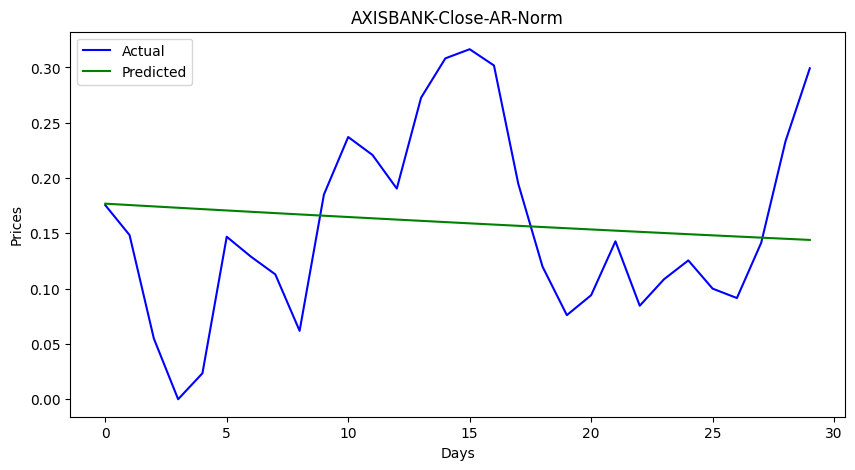

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, color='blue', label="Actual")
plt.plot(y_pred, color='green', label="Predicted")
plt.title("AXISBANK-Close-AR-Norm")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [20]:
p_values = range(0, 5)
q_values = range(0, 5)

# Perform grid search
for p in p_values:
    for q in q_values:
        try:
            # Fit the ARMA model
            model = ARIMA(X_train, order=(p, 0, q))
            model_fit = model.fit()
            
            # Make predictions
            predictions = model_fit.forecast(steps=len(X_test))
            
            # Calculate RMSE and MAPE
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            mape = mean_absolute_percentage_error(y_test, predictions)
            
            # Update the best model if current one is better
            if rmse < best_rmse and mape < best_mape:
                best_rmse = rmse
                best_mape = mape
                best_order = (p, q)
        except Exception as e:
            # Handle exceptions in fitting the model
            print(f"An error occurred for p={p}, q={q}: {e}")

print(f'Best RMSE: {rmse}')
print(f'Best MAPE: {mape}')
print(f'Best order (p, q): {order}')

An error occurred for p=0, q=0: name 'best_rmse' is not defined
An error occurred for p=0, q=1: name 'best_rmse' is not defined
An error occurred for p=0, q=2: name 'best_rmse' is not defined
An error occurred for p=0, q=3: name 'best_rmse' is not defined
An error occurred for p=0, q=4: name 'best_rmse' is not defined
An error occurred for p=1, q=0: name 'best_rmse' is not defined
An error occurred for p=1, q=1: name 'best_rmse' is not defined
An error occurred for p=1, q=2: name 'best_rmse' is not defined
An error occurred for p=1, q=3: name 'best_rmse' is not defined
An error occurred for p=1, q=4: name 'best_rmse' is not defined
An error occurred for p=2, q=0: name 'best_rmse' is not defined
An error occurred for p=2, q=1: name 'best_rmse' is not defined
An error occurred for p=2, q=2: name 'best_rmse' is not defined
An error occurred for p=2, q=3: name 'best_rmse' is not defined
An error occurred for p=2, q=4: name 'best_rmse' is not defined
An error occurred for p=3, q=0: name 'be

NameError: name 'order' is not defined